In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split  # 임의로 분할 , 
# 트레이닝 셋과 검증 셋
import matplotlib.pyplot as plt
import random
import os


Using TensorFlow backend.
C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_05\Anaconda3\envs

In [19]:
print(os.listdir("C:/Users/ICT01_05/Desktop/3차/images"))
# 파일 불러오기 

['potg', 'potg (1).jpg', 'potg (10).jpg', 'potg (100).jpg', 'potg (101).jpg', 'potg (102).jpg', 'potg (103).jpg', 'potg (104).jpg', 'potg (105).jpg', 'potg (106).jpg', 'potg (107).jpg', 'potg (108).jpg', 'potg (109).jpg', 'potg (11).jpg', 'potg (110).jpg', 'potg (111).jpg', 'potg (112).jpg', 'potg (113).jpg', 'potg (114).jpg', 'potg (115).jpg', 'potg (116).jpg', 'potg (117).jpg', 'potg (118).jpg', 'potg (119).jpg', 'potg (12).jpg', 'potg (120).jpg', 'potg (121).jpg', 'potg (122).jpg', 'potg (123).jpg', 'potg (124).jpg', 'potg (125).jpg', 'potg (126).jpg', 'potg (127).jpg', 'potg (128).jpg', 'potg (129).jpg', 'potg (13).jpg', 'potg (130).jpg', 'potg (131).jpg', 'potg (132).jpg', 'potg (133).jpg', 'potg (134).jpg', 'potg (135).jpg', 'potg (136).jpg', 'potg (137).jpg', 'potg (138).jpg', 'potg (139).jpg', 'potg (14).jpg', 'potg (140).jpg', 'potg (141).jpg', 'potg (142).jpg', 'potg (143).jpg', 'potg (144).jpg', 'potg (145).jpg', 'potg (146).jpg', 'potg (147).jpg', 'potg (148).jpg', 'potg (1

In [2]:
FAST_RUN = False
IMAGE_WIDTH=256
IMAGE_HEIGHT=256
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
# 컬러니까 3개 채널. 


In [3]:
filenames = os.listdir("C:/Users/ICT01_05/Desktop/3차/images")
categories = []  ## 저장 카테고리 
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'prod':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [4]:
df = df.sample(frac = 1).reset_index(drop = True)

In [5]:
df

,filename,category
0,prod. (23).jpg,1
1,prod. (194).jpg,1
2,potg. (6).jpg,0
3,prod. (82).jpg,1
4,prod. (213).jpg,1
...,...,...
408,potg. (110).jpg,0
409,potg. (97).jpg,0
410,prod. (71).jpg,1
411,potg. (127).jpg,0


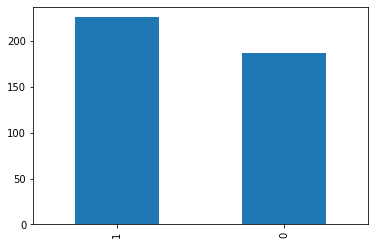

In [6]:
df['category'].value_counts().plot.bar()

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense, Activation, BatchNormalization

In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (IMAGE_WIDTH,
                                                               IMAGE_HEIGHT,
                                                               IMAGE_CHANNELS)))
model.add(BatchNormalization())
# 배치 정규화 : 인공신경망에 평균 0, 분산 1로 정규화해 학습이 잘 일어나도록 돕는 방식
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# 완전연결층 
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(2, activation = 'softmax'))  # 상품과 비상품 두개 분류

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [9]:
model.summary()  ## 모델 구조 시각화 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)       

In [10]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [11]:
earlystop = EarlyStopping(patience = 10)

# 이전 에폭과 비교했을때 loss가 감소하지 않는다면 10번 참고 에폭을 중단해라. 

In [12]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
## 에폭이 1번동안에 모델 성능이 향성되지 않는다면 learning_rate를 줄여라 

In [13]:
callbacks = [earlystop,learning_rate_reduction ]
# 콜백에 두가지 함수를 추가. 

In [14]:
# 0과 1을 문자열로 교체. 

df["category"] = df["category"].replace({0: 'potg', 1: 'prod'}) 

In [15]:
train_df, validate_df = train_test_split(df, test_size = 0.3, random_state = 42)
# train_test_split 함수는 행렬을 훈련 부분 집합과 검증 부분 집합으로 무작위로 나누다. 
# test_size = 샘플의 비율

# 인덱스를 재설정한다. 
train_df = train_df.reset_index(drop = True)
validate_df = validate_df.reset_index(drop = True)



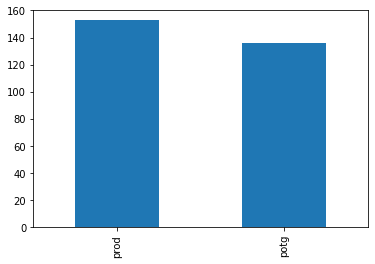

In [16]:
train_df['category'].value_counts().plot.bar()
# 훈련세트가 어떻게 나누어져 있는가

In [17]:
train_df.shape

(289, 2)

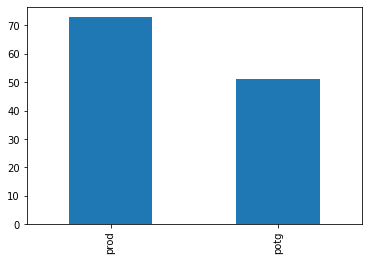

In [18]:
validate_df['category'].value_counts().plot.bar()
# 검증셋이 어떻게 나누어져 있는가. 

In [19]:
validate_df.shape

(124, 2)

In [20]:
total_train = train_df.shape[0]  # 교육 데이터 289개 
total_validate = validate_df.shape[0] # 검증 데이터 124개
batch_size=15

In [21]:
total_train

289

In [22]:
total_validate

124

In [23]:
# ImageDataGenerator를 이용해서 데이터 셋의 크기 확장. ..

train_datagen = ImageDataGenerator(
    rotation_range=15,  # 회전 범위
    rescale=1./255,   # 이미지의 디지털 스케일링...?
    shear_range=0.1,   #?
    zoom_range=0.2,    #줌의 범위 
    horizontal_flip=True,   #수평
    width_shift_range=0.1,  # 수평적 시프트 범위
    height_shift_range=0.1   # 수직 시프트 범위 
)

# 변환 값: (x,y)
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
   "C:/Users/ICT01_05/Desktop/3차/images",  # 이경로에 포함된 모든 이미지.  
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE, #사이즈
    class_mode='categorical',
    batch_size=batch_size  # 배치 데이터의 크기
)

Found 289 validated image filenames belonging to 2 classes.


In [24]:
train_df.shape

(289, 2)

In [25]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:/Users/ICT01_05/Desktop/3차/images", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 124 validated image filenames belonging to 2 classes.


In [27]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "C:/Users/ICT01_05/Desktop/3차/images", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


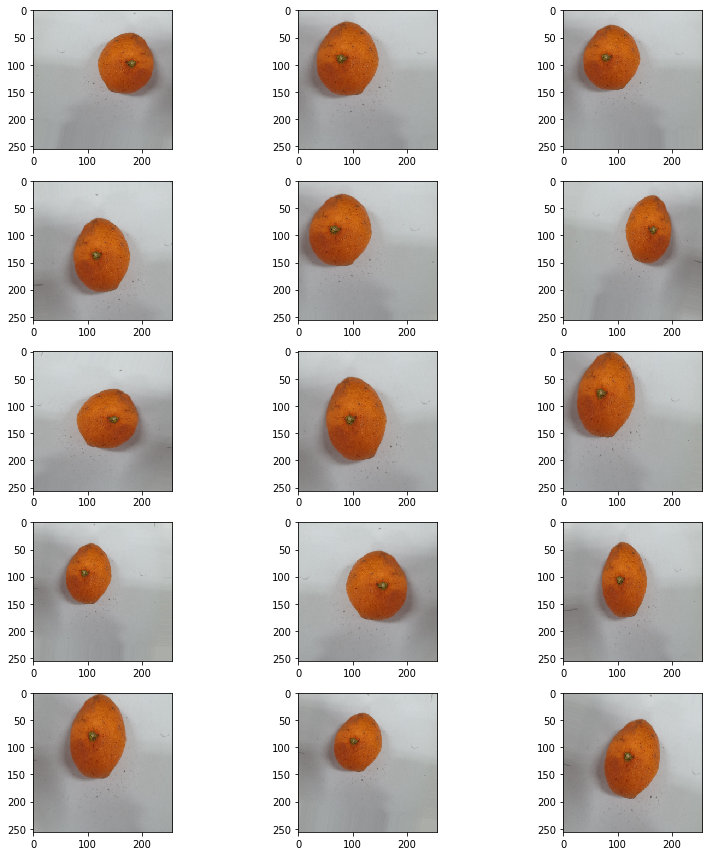

In [28]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [29]:
epochs=3 if FAST_RUN else 20
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)



Epoch 1/20


ResourceExhaustedError: 2 root error(s) found.
  (0) Resource exhausted: OOM when allocating tensor with shape[15,32,127,127] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node max_pooling2d_1/MaxPool}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[metrics/accuracy/Identity/_233]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

  (1) Resource exhausted: OOM when allocating tensor with shape[15,32,127,127] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node max_pooling2d_1/MaxPool}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

0 successful operations.
0 derived errors ignored.

In [60]:
model.save_weights("model.h5")

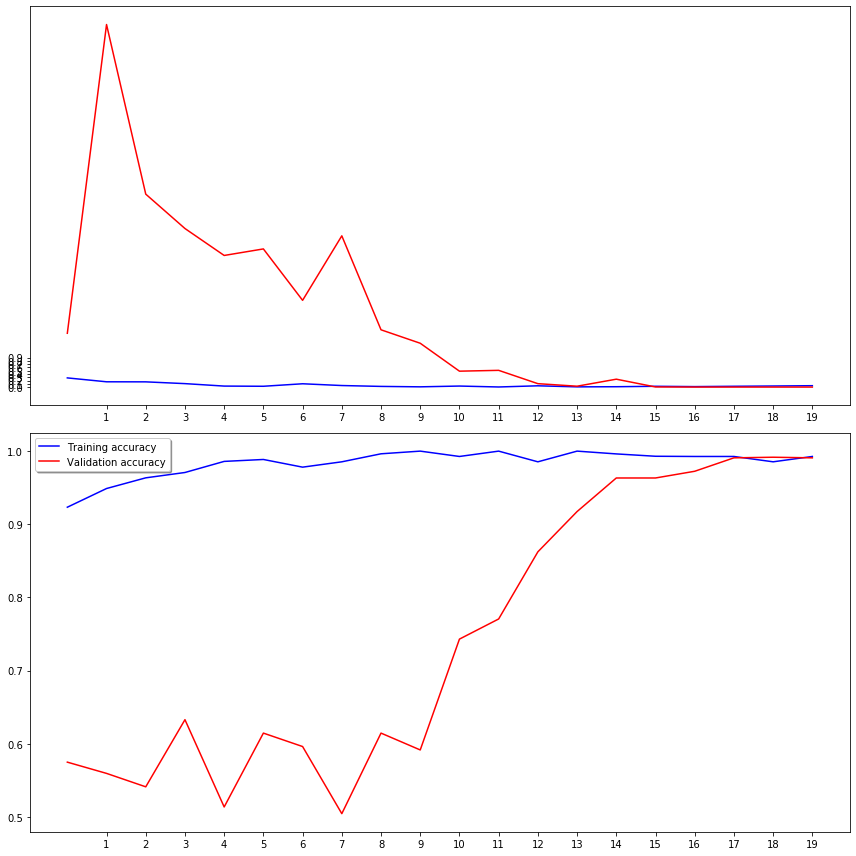

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [62]:
test_filenames = os.listdir("C:/Users/ICT01_12/Desktop/project/aproperty")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [63]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "C:/Users/ICT01_12/Desktop/project/aproperty", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 413 validated image filenames.


In [64]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [65]:
test_df['category'] = np.argmax(predict, axis=-1)

In [66]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [67]:
test_df['category'] = test_df['category'].replace({ 'aproperty': 1, 'besangpoom': 0 })

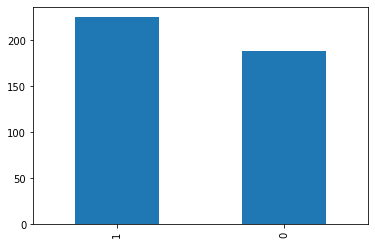

In [68]:
test_df['category'].value_counts().plot.bar()